<a href="https://colab.research.google.com/github/CuriousAboutData/portfolio-projects/blob/main/co2_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers wordcloud matplotlib emoji==0.6.0

In [ ]:
# !pip install snscrape
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "carbon emission since:2020-01-01 until:2023-05-31"
tweets = []
limit = 500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
tweets_df = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

tweets_df.head()

In [ ]:
len(tweets_df)

500

In [22]:
text_list = tweets_df['Text'].values.tolist()
print(text_list)

['Everytime I fart AOC sucks my dick for some instant shade relief from the GHGs. I then pay my carbon emission tax on her face and in her throat.', "@WallStreetSilv There goes the truck's entire carbon emission", "N. CANADA LOG-JAM 20 sq. miles, 3.4 MILLION TONS CARBON (study)\nIn Canada's far north Mackenzie Delta 20 sq. miles of logs contain 3.4 million tons of carbon \nGlobal warming could lead to its break down and carbon emission. https://t.co/xOgJFG2uTQ\n#climatechange. #globalwarming https://t.co/cejrWdWGFl", "He's got a point. This is all about control &amp; $$ nothing more. #ClimateScam #ClimateCult #NWO #Agenda2030 #carbontax #CarbonFootprint #CarbonEmission #GreatReset #FtheWEF 2/2 https://t.co/03o25Cdn5b", "There's not enough rare 🌍 minerals to replace all cars w/ EVs. It's a slow creep to taking away our freedom to travel! #NWO #Agenda2030 #carbontax #CarbonFootprint #CarbonEmission #GreatReset #FtheWEF #ClimateScam #ClimateCult 1/2", "Nearly three years ago, I developed 

In [23]:
from transformers import pipeline

sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

tweets_sentiment = []
for text in text_list:
    try: 
      sentiment = sentiment_analysis(text)
      tweets_sentiment.append({'tweet': text, 'sentiment': sentiment[0]['label']})
    except Exception:
      pass

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Token indices sequence length is longer than the specified maximum sequence length for this model (341 > 128). Running this sequence through the model will result in indexing errors


In [24]:
sentiment_df = pd.DataFrame(tweets_sentiment)
pd.set_option('display.max_colwidth', None)

display(sentiment_df[sentiment_df["sentiment"] == 'POS'].head(1))
display(sentiment_df[sentiment_df["sentiment"] == 'NEU'].head(1))
display(sentiment_df[sentiment_df["sentiment"] == 'NEG'].head(1))


,tweet,sentiment
12,"""@Talaxeum green project launcher blockchain based platform specializing in supporting green projects for energy efficient and net- zero carbon emission project. #Talaxeum #Testnet #Airdrop""",POS


,tweet,sentiment
2,"N. CANADA LOG-JAM 20 sq. miles, 3.4 MILLION TONS CARBON (study)\nIn Canada's far north Mackenzie Delta 20 sq. miles of logs contain 3.4 million tons of carbon \nGlobal warming could lead to its break down and carbon emission. https://t.co/xOgJFG2uTQ\n#climatechange. #globalwarming https://t.co/cejrWdWGFl",NEU


,tweet,sentiment
0,Everytime I fart AOC sucks my dick for some instant shade relief from the GHGs. I then pay my carbon emission tax on her face and in her throat.,NEG


## Visualize the sentiments

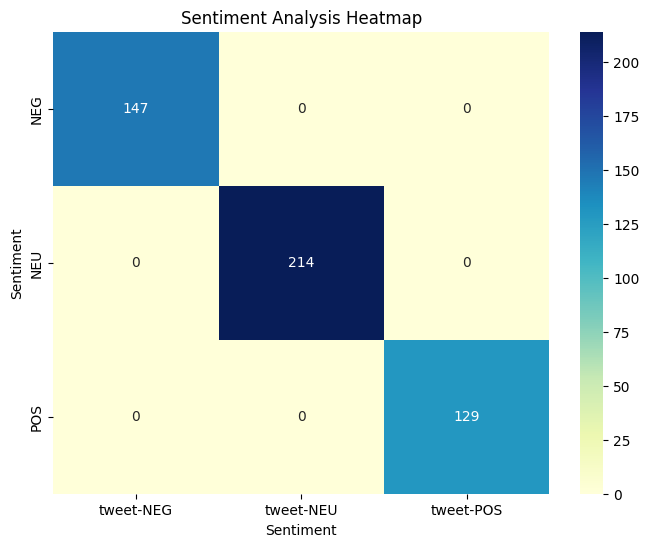

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = sentiment_df['sentiment'].value_counts()

# Create a pivot table with sentiment as rows and columns
heatmap_data = sentiment_df.pivot_table(index='sentiment', columns='sentiment', aggfunc=len, fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis Heatmap')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Wordcloud with positive tweets

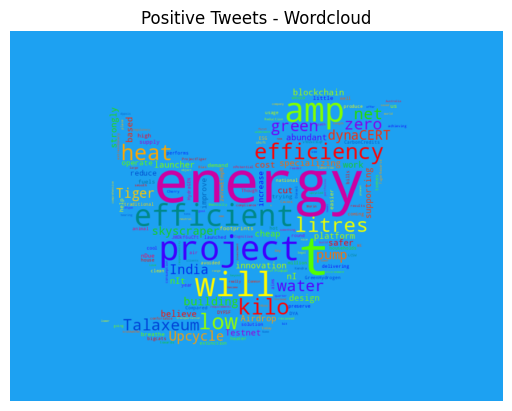

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import numpy as np
from PIL import Image

mask = np.array(Image.open("/content/gdrive/MyDrive/Colab Notebooks/twitter.jpg").convert("L"))

positive_tweets = sentiment_df['tweet'][sentiment_df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT", "nhttps", "n", "carbon emission", "CarbonEmission", "carbon", "emission"] + list(STOPWORDS)

positive_wordcloud = WordCloud(collocations = False, background_color="#1DA1F2", stopwords = stop_words, contour_color='#1DA1F2', contour_width=1, mask=mask, colormap='prism').generate(str(positive_tweets))

plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')

# plt.savefig("gdrive/MyDrive/Colab Notebooks/wordcloud.png", format="png")

plt.show()

### Wordcloud with negative tweets

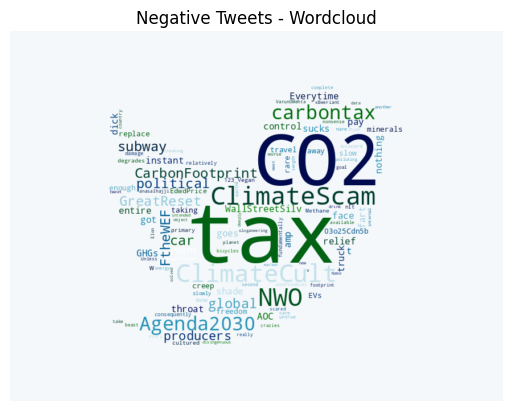

In [ ]:
negative_tweets = sentiment_df['tweet'][sentiment_df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT", "nhttps", "n", "carbon emission", "CarbonEmission", "carbon", "emission"] + list(STOPWORDS)
negative_wordcloud = WordCloud(collocations = False, background_color="#F5F8FA", stopwords = stop_words, mask=mask, colormap='ocean').generate(str(negative_tweets))

plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import plotly.express as px

sentiment_counts = sentiment_df['sentiment'].value_counts().reset_index()

# Create an interactive bar chart
fig = px.bar(sentiment_counts, x='index', y='sentiment', color='index',
             labels={'index': 'sentiment', 'sentiment': 'Count'},
             title='Sentiment Analysis')

# Update the layout to make it interactive
fig.update_layout(
    hovermode='closest',
    xaxis=dict(title='Sentiment'),
    yaxis=dict(title='Count'),
    showlegend=False
)

# Show the interactive chart
fig.show()
